# Wallstreetbets sentiment analysis

## Background:

## 1.To get the weekly sentiment of   stocks from wallstreetbets post (subreddit)
## 2.To get the frequency of mentioned stocks as well 
## 3.To find the corrlelation between the percentage change of stock and sentiment

## importing libraries

In [1]:
import pandas as pd
import requests
import io

## importing stock ticker symbol from a website

In [2]:
ticker_response=requests.get("https://www.sec.gov/include/ticker.txt")

In [3]:
ticker=pd.read_csv(io.StringIO(ticker_response.text),delimiter='\t',header=None,usecols=[0])[0].to_list()
ticker

['aapl',
 'msft',
 'googl',
 'amzn',
 'tsla',
 'brk-b',
 'fb',
 'nvda',
 'tsm',
 'unh',
 'jnj',
 'v',
 'wmt',
 'spy',
 'pg',
 'xom',
 'jpm',
 'ma',
 'lvmuy',
 'cvx',
 'hd',
 'bac',
 'pfe',
 'lly',
 'abbv',
 'ko',
 'bhp',
 'nvo',
 'cost',
 'baba',
 'asml',
 'pep',
 'dis',
 'avgo',
 'tm',
 'vz',
 'tmo',
 'azn',
 'mrk',
 'csco',
 'cmcsa',
 'shel',
 'orcl',
 'nke',
 'abt',
 'nvs',
 'acn',
 'adbe',
 'dhr',
 'mcd',
 'crm',
 'intc',
 'wfc',
 'tmus',
 'bmy',
 'ups',
 'nee',
 'lin',
 'txn',
 'pm',
 'schw',
 'rtx',
 'unp',
 'ry',
 'qcom',
 'amd',
 'nflx',
 'ptr',
 'rtntf',
 'ms',
 'mdt',
 't',
 'sny',
 'hsbc',
 'bx',
 'axp',
 'cvs',
 'amgn',
 'low',
 'td',
 'spgi',
 'de',
 'hon',
 'qqq',
 'rio',
 'cop',
 'tte',
 'intu',
 'lmt',
 'eqnr',
 'antm',
 'sap',
 'cat',
 'deo',
 'pld',
 'pypl',
 'bud',
 'gsk',
 'amt',
 'ul',
 'tgt',
 'ibm',
 'sony',
 'abnb',
 'hdb',
 'gs',
 'ba',
 'chtr',
 'blk',
 'bp',
 'now',
 'mo',
 'c',
 'isrg',
 'amat',
 'jd',
 'ge',
 'lfc',
 'syk',
 'bti',
 'adp',
 'pbr',
 'el',
 '

In [4]:
#capitalize the stock symbol
ticker=[str(ticker[i]).upper() for i in range(len(ticker))]
print(ticker)

['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'BRK-B', 'FB', 'NVDA', 'TSM', 'UNH', 'JNJ', 'V', 'WMT', 'SPY', 'PG', 'XOM', 'JPM', 'MA', 'LVMUY', 'CVX', 'HD', 'BAC', 'PFE', 'LLY', 'ABBV', 'KO', 'BHP', 'NVO', 'COST', 'BABA', 'ASML', 'PEP', 'DIS', 'AVGO', 'TM', 'VZ', 'TMO', 'AZN', 'MRK', 'CSCO', 'CMCSA', 'SHEL', 'ORCL', 'NKE', 'ABT', 'NVS', 'ACN', 'ADBE', 'DHR', 'MCD', 'CRM', 'INTC', 'WFC', 'TMUS', 'BMY', 'UPS', 'NEE', 'LIN', 'TXN', 'PM', 'SCHW', 'RTX', 'UNP', 'RY', 'QCOM', 'AMD', 'NFLX', 'PTR', 'RTNTF', 'MS', 'MDT', 'T', 'SNY', 'HSBC', 'BX', 'AXP', 'CVS', 'AMGN', 'LOW', 'TD', 'SPGI', 'DE', 'HON', 'QQQ', 'RIO', 'COP', 'TTE', 'INTU', 'LMT', 'EQNR', 'ANTM', 'SAP', 'CAT', 'DEO', 'PLD', 'PYPL', 'BUD', 'GSK', 'AMT', 'UL', 'TGT', 'IBM', 'SONY', 'ABNB', 'HDB', 'GS', 'BA', 'CHTR', 'BLK', 'BP', 'NOW', 'MO', 'C', 'ISRG', 'AMAT', 'JD', 'GE', 'LFC', 'SYK', 'BTI', 'ADP', 'PBR', 'EL', 'VALE', 'ENB', 'BKNG', 'GLNCY', 'CNI', 'CB', 'EADSY', 'MDLZ', 'DUK', 'ZTS', 'INFY', 'BAM', 'MMC', 'CME', 'MMM', 'CCI', 'CI',

## Loading raw data of a week from Dec12 to Dec 19

In [5]:
df2=pd.read_csv('dataframeDec12Dec19.csv',header=None)
df2.head()

,0,1,2,3,4,5
0,EverGrande Defaults,NaN,/r/wallstreetbets/comments/refgs2/evergrande_d...,whicky1978,1,2021-12-11 21:00:11
1,EverGrande defaults,NaN,/r/wallstreetbets/comments/refhx8/evergrande_d...,whicky1978,1,2021-12-11 21:01:40
2,Me doing research,NaN,/r/wallstreetbets/comments/refsna/me_doing_res...,RenewAi,1,2021-12-11 21:18:56
3,Daytrading isn’t a “real” job,NaN,/r/wallstreetbets/comments/refvj1/daytrading_i...,prettysureiminsane,1,2021-12-11 21:23:32
4,Tim 🍏Gives $275 Billion to CCP (Designed in CA...,NaN,/r/wallstreetbets/comments/refx2p/tim_gives_27...,snkbrdng,1,2021-12-11 21:26:04


In [6]:
df2.columns=['title','column2','column3','author','column5','time']

In [7]:
print(df2.title)

0                                     EverGrande Defaults
1                                     EverGrande defaults
2                                       Me doing research
3                           Daytrading isn’t a “real” job
4       Tim 🍏Gives $275 Billion to CCP (Designed in CA...
                              ...                        
4792    I think my granpa belongs here. He's got hands...
4793    Adam Aron our lord and savior signed my dollar...
4794         Have any of you ever gotten a gambling high?
4795    China's central bank cuts a benchmark rate for...
4796    205k usd one day loss . Fml options expired wo...
Name: title, Length: 4797, dtype: object


## Use of Regular expression to capture the stock's symbol mentioned in each title
## Use of dictionary to count the stock symbol and to group the list of titles based on stock symbol

In [8]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[A-Z]{2,5}")
tickers={}
titles={}
for i in range(len(df2.title)):
    sentence=df2.title[i]
    token=tokenizer.tokenize(sentence)
    token_set=set(token)
    #print(token_set)
    ticker_set=set(ticker)
    stock_list=list(set.intersection(token_set,ticker_set))
    for stock in stock_list:
        if stock in tickers:
            tickers[stock]+=1
            titles[stock].append(sentence)
        else:
            tickers[stock]=1
            titles[stock]=[sentence]
            
    

## Count of stock symbol

In [9]:
tickers

{'CRTX': 6,
 'DD': 36,
 'CHW': 1,
 'PYPL': 2,
 'TSLA': 55,
 'SFT': 1,
 'ABNB': 3,
 'LCID': 7,
 'AKA': 1,
 'GME': 112,
 'BJ': 1,
 'GEVO': 1,
 'AAPL': 17,
 'BYND': 5,
 'HIVE': 1,
 'IONS': 1,
 'USA': 3,
 'BLUE': 4,
 'BNGO': 2,
 'ARE': 3,
 'VIR': 9,
 'ROKU': 7,
 'IT': 13,
 'EVO': 3,
 'UP': 8,
 'NIO': 31,
 'ON': 21,
 'GO': 9,
 'NG': 18,
 'LOGI': 8,
 'PT': 12,
 'TLRY': 7,
 'COIN': 6,
 'NE': 2,
 'CCL': 2,
 'GER': 1,
 'XL': 1,
 'TALK': 3,
 'OGE': 1,
 'AMC': 107,
 'BB': 9,
 'DARE': 1,
 'ESSC': 6,
 'NOW': 9,
 'LIVE': 2,
 'JPM': 12,
 'MMTLP': 9,
 'AMD': 6,
 'GP': 1,
 'BABA': 2,
 'ROSE': 1,
 'BOAS': 1,
 'APSG': 2,
 'MVIS': 7,
 'GGPI': 6,
 'OG': 22,
 'NU': 1,
 'HCP': 1,
 'UVXY': 2,
 'WISH': 17,
 'DCGO': 1,
 'EBS': 1,
 'FDX': 7,
 'DS': 2,
 'ADBE': 8,
 'NGS': 1,
 'TD': 5,
 'BFRI': 16,
 'CFVI': 3,
 'SPY': 43,
 'VERY': 1,
 'DWAC': 5,
 'IGEN': 2,
 'DIS': 4,
 'UWMC': 13,
 'AI': 7,
 'BBAI': 4,
 'ALZN': 6,
 'SI': 5,
 'RH': 5,
 'ARK': 3,
 'HOOD': 7,
 'PM': 1,
 'TEAM': 1,
 'ARNA': 3,
 'ED': 9,
 'UK': 6,
 'IS

# Grouped list of titles based on stock symbol

In [10]:
print(titles)

{'CRTX': ['Take this to the moon CRTX - Cortexyme, Inc', 'Take this to the moon CRTX', 'Take this to the moon CRTX', 'Is it time to short squeeze CRTX?', 'Is it time to short squeeze CRTX?', '$CRTX easiest 0DTE option gamble on the planet . 40% short interest with all the room in the world to go. Thoughts??'], 'DD': ["Discussion post for futures travelers n retards / yolo'rs CHW chime bank will STRIVE. 🤌🏾🦍(When publicly traded that is) *Not financial advice. Please do your own DD and research investments.*", 'FedEx heading into the shits? Discussion with some DD', 'I did the deep dive on this DD so you didn’t have to. A true autists approach for possible the strongest play of the year. This coming Tuesday, December 14th, is International Monkey Day. Monkey (Ape) stonks will be in very high demand, especially $GME. Planning a pre market entry on $GME on Monday.', '$NU DD. Nubank about to explode in Brazil. Look at this graph, 750m backed by Buffett, ties with Sequoia Capital.', 'Life sa

In [11]:
# Titles of Telsa
titles['TSLA']

['Young v. Tesla - interesting lawsuit, short TSLA?',
 'Anatomy of a an Electric Bubble #TSLA',
 'Anatomy of a an Electric Bubble #TSLA',
 '$TSLA is for $1100 today',
 'Is Elon trying to nudge TSLA down a bit towards a realistic valuation?',
 '2K profit from aapl into TSLA calls 🤔',
 '$773K TSLA calls bought just before close today',
 'Had to fix it up a little, never forgot those days of Pre-GME PLTR and TSLA',
 'Anyone else buying the TSLA dip?',
 'TSLA time to buy!',
 'TSLA - Day',
 'RIP your $TSLA calls',
 'Just Bought 500K In 260 TSLA Calls',
 'How Low can TSLA go?',
 'How low can TSLA prices go?',
 'TSLA now?',
 '$TSLA call option loss',
 "today's TSLA positions with 5x leveraged CDFs, that short might pay off big time soon 👀",
 "today's TSLA positions, let's see how the covered CFDs pay off 👀",
 'TSLA: Elon to sell just 4-5 blocks, bullish?',
 "So last time I lost 99% of savings to $TSLA call and I thought it won't happen again. Now I lost &gt;100%",
 "So last time I lost 99% of

## sorts the dictionary based on the count

In [12]:
symbols = dict(sorted(tickers.items(), key=lambda item: item[1], reverse = True))


In [13]:
symbols

{'GME': 112,
 'AMC': 107,
 'TSLA': 55,
 'SPY': 43,
 'DD': 36,
 'NIO': 31,
 'JP': 23,
 'OG': 22,
 'ON': 21,
 'NG': 18,
 'AAPL': 17,
 'WISH': 17,
 'BFRI': 16,
 'PLTR': 14,
 'IT': 13,
 'UWMC': 13,
 'IS': 13,
 'PT': 12,
 'JPM': 12,
 'SDC': 12,
 'NVDA': 11,
 'FOR': 11,
 'QQQ': 10,
 'VIR': 9,
 'GO': 9,
 'BB': 9,
 'NOW': 9,
 'MMTLP': 9,
 'ED': 9,
 'ANY': 9,
 'TA': 9,
 'DKNG': 9,
 'PFE': 9,
 'UP': 8,
 'LOGI': 8,
 'ADBE': 8,
 'PTPI': 8,
 'NOK': 8,
 'LCID': 7,
 'ROKU': 7,
 'TLRY': 7,
 'MVIS': 7,
 'FDX': 7,
 'AI': 7,
 'HOOD': 7,
 'FREE': 7,
 'ALL': 7,
 'STEM': 7,
 'CRTX': 6,
 'COIN': 6,
 'ESSC': 6,
 'AMD': 6,
 'GGPI': 6,
 'ALZN': 6,
 'UK': 6,
 'MEME': 6,
 'PLBY': 6,
 'CLOV': 6,
 'MMAT': 6,
 'PL': 6,
 'ONE': 6,
 'MSFT': 6,
 'FOMC': 6,
 'TTCF': 6,
 'ME': 6,
 'DTE': 6,
 'BYND': 5,
 'TD': 5,
 'DWAC': 5,
 'SI': 5,
 'RH': 5,
 'SEAC': 5,
 'CLNE': 5,
 'DM': 5,
 'MA': 5,
 'RKT': 5,
 'ING': 5,
 'BBIG': 5,
 'PLUG': 5,
 'JAN': 5,
 'DROP': 5,
 'GAIN': 5,
 'RIVN': 5,
 'BIG': 5,
 'CVM': 5,
 'ORC': 5,
 'SNDL': 5

In [14]:
#converted to dataframe
df4=pd.DataFrame.from_dict(symbols,orient='index',columns=['Mentions'])
df4.head()

,Mentions
GME,112
AMC,107
TSLA,55
SPY,43
DD,36


In [15]:
len(df4)

447

In [16]:
df4.reset_index(level=0,inplace=True)

In [17]:
top_picks = list(symbols.keys())[0:10]
print(top_picks)

['GME', 'AMC', 'TSLA', 'SPY', 'DD', 'NIO', 'JP', 'OG', 'ON', 'NG']


## Getting the data for visualization

In [18]:
times = []
top = []
for i in top_picks:
    print(f"{i}: {symbols[i]}")
    times.append(symbols[i])
    top.append(f"{i}: {symbols[i]}")
   

GME: 112
AMC: 107
TSLA: 55
SPY: 43
DD: 36
NIO: 31
JP: 23
OG: 22
ON: 21
NG: 18


In [19]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


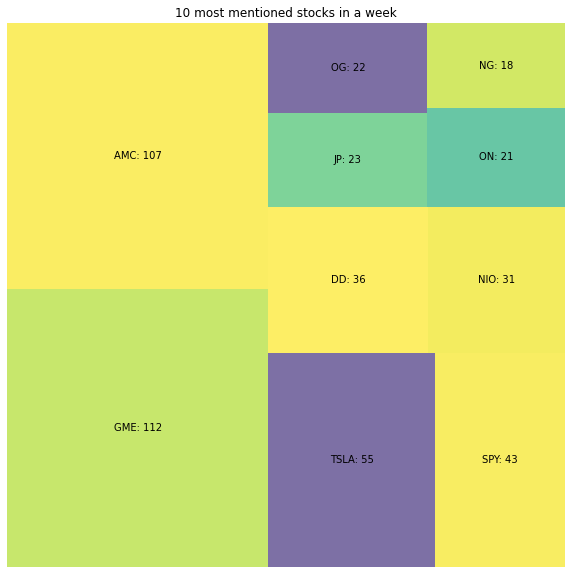

In [20]:
# Date Visualization
import squarify
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
# most mentioned picks    
squarify.plot(sizes=times, label=top, alpha=.7 )
plt.axis('off')
plt.title("10 most mentioned stocks in a week")
plt.show()

In [21]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


## Importing nltk library

In [22]:
import nltk 
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/bikenkc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## NLTK VADER is vocabulary and rule based library to predict the sentiment of a string
## We can also add our own words in the dictonary to make it more effective 


In [23]:
new_words = {
    'citron': -4.0,  
    'hidenburg': -4.0,        
    'moon': 4.0,
    'highs': 2.0,
    'mooning': 4.0,
    'long': 2.0,
    'short': -2.0,
    'call': 4.0,
    'calls': 4.0,    
    'put': -4.0,
    'puts': -4.0,    
    'break': 2.0,
    'tendie': 2.0,
     'tendies': 2.0,
     'town': 2.0,     
     'overvalued': -3.0,
     'undervalued': 3.0,
     'buy': 4.0,
     'sell': -4.0,
     'gone': -1.0,
     'gtfo': -1.7,
     'paper': -1.7,
     'bullish': 3.7,
     'bearish': -3.7,
     'bagholder': -1.7,
     'stonk': 1.9,
     'green': 1.9,
     'money': 1.2,
     'print': 2.2,
     'rocket': 2.2,
     'bull': 2.9,
     'bear': -2.9,
     'pumping': -1.0,
     'sus': -3.0,
     'offering': -2.3,
     'rip': -4.0,
     'downgrade': -3.0,
     'upgrade': 3.0,     
     'maintain': 1.0,          
     'pump': 1.9,
     'hot': 1.5,
     'drop': -2.5,
     'rebound': 1.5,  
     'crack': 2.5,}
#extremely positive should be +4
#extremely negative should be -4

## Importing NLTK VADER for sentiment analysis

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# Applying Sentiment Analysis

 
vader = SentimentIntensityAnalyzer()
# adding custom words from data.py 
vader.lexicon.update(new_words)

# Working of VADER Sentiment Analyser

In [25]:
print(vader.polarity_scores('TSLA will increase'))   #

{'neg': 0.0, 'neu': 0.465, 'pos': 0.535, 'compound': 0.3182}


In [26]:
print(vader.polarity_scores('TSLA is not increasing'))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [27]:
print(vader.polarity_scores('TSLA is not good'))

{'neg': 0.445, 'neu': 0.555, 'pos': 0.0, 'compound': -0.3412}


In [28]:
print(vader.polarity_scores('TSLA to the moon'))    #for the updated words

{'neg': 0.0, 'neu': 0.375, 'pos': 0.625, 'compound': 0.7184}


## Calculating the average sentiment of each stock

In [29]:
scores, s = {}, {}
picks_sentiment = list(symbols.keys())
for symbol in picks_sentiment:
    stock_title = titles[symbol]
    for title in stock_title:
        score = vader.polarity_scores(title)
        if symbol in s:
            s[symbol][title] = score
        else:
            s[symbol] = {title:score}      
        if symbol in scores:
            for key, _ in score.items():
                scores[symbol][key] += score[key]
        else:
            scores[symbol] = score
            
    # calculating avg.
    for key in score:
        scores[symbol][key] = scores[symbol][key] / symbols[symbol]
        scores[symbol][key]  = "{pol:.3f}".format(pol=scores[symbol][key])
 
# printing sentiment analysis 
print("Sentiment analysis of top 10 picks:")
df3 = pd.DataFrame(scores)
df3.index = ['Bearish', 'Neutral', 'Bullish', 'Total/Compound']
df3 = df3.T
df3.head(10)

Sentiment analysis of top 10 picks:


,Bearish,Neutral,Bullish,Total/Compound
GME,0.057,0.800,0.143,0.190
AMC,0.087,0.778,0.136,0.074
TSLA,0.128,0.720,0.151,0.050
SPY,0.064,0.750,0.186,0.175
DD,0.056,0.833,0.111,0.164
NIO,0.051,0.895,0.054,0.032
JP,0.038,0.761,0.201,0.308
OG,0.059,0.781,0.159,0.248
ON,0.046,0.815,0.139,0.178
NG,0.090,0.803,0.108,0.053


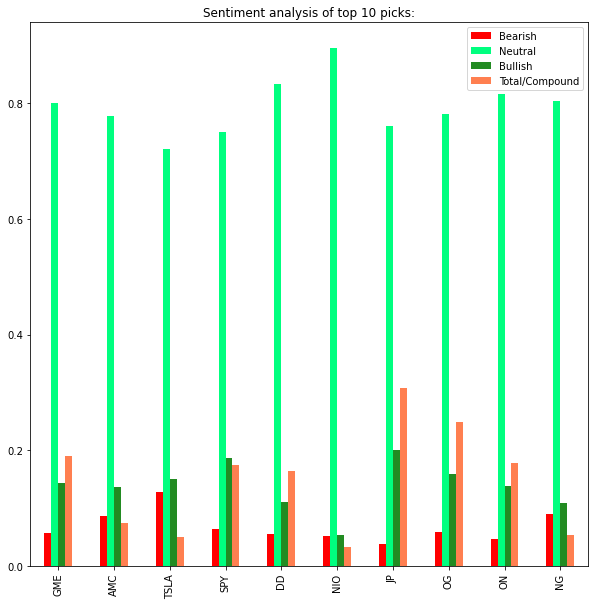

In [30]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


# Sentiment analysis
df3 = df3.astype(float)
colors = ['red', 'springgreen', 'forestgreen', 'coral']
df3[0:10].plot(kind = 'bar', color=colors, title="Sentiment analysis of top 10 picks:")
plt.show()

In [31]:
df3.reset_index(level=0,inplace=True)

## Merging Mentions and Sentiment in one dataframe

In [32]:
df5=df4.merge(df3)

In [33]:
df5.head()

,index,Mentions,Bearish,Neutral,Bullish,Total/Compound
0,GME,112,0.057,0.800,0.143,0.190
1,AMC,107,0.087,0.778,0.136,0.074
2,TSLA,55,0.128,0.720,0.151,0.050
3,SPY,43,0.064,0.750,0.186,0.175
4,DD,36,0.056,0.833,0.111,0.164


## Saved the dataframe as csv file and repeating the above step for another week raw data

In [34]:
#df5.to_csv('MentionsAndSentimentDec12Dec19.csv')

## Importing the weekly sentiment analysis of each stocks

In [35]:
result1=pd.read_csv('MentionsAndSentimentDec12Dec19.csv')
result2=pd.read_csv('MentionsAndSentimentDec19Dec26.csv')
result3=pd.read_csv('MentionsAndSentimentDec26Jan2.csv')
result4=pd.read_csv('MentionsAndSentimentJan2Jan9.csv')
result5=pd.read_csv('MentionsAndSentimentJan9Jan16.csv')
result6=pd.read_csv('MentionsAndSentimentJan16Jan23.csv')
result7=pd.read_csv('MentionsAndSentimentJan23Jan30.csv')
result8=pd.read_csv('MentionsAndSentimentJan30Feb6.csv')
result9=pd.read_csv('MentionsAndSentimentFeb6Feb13.csv')

In [36]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


# Pick the stock

In [38]:
stock_name='NIO'

## Importing yfinance and padas_datareader to produce the stock price of paticular stock

In [39]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo(stock_name, start="2021-12-12", end="2022-02-13",interval='1wk')
# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
# valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo

[*********************100%***********************]  1 of 1 completed


In [40]:
data.head(11)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-13,33.680000,34.669998,28.020000,30.000000,30.000000,255939900
2021-12-20,29.450001,30.799999,27.790001,30.520000,30.520000,207347400
2021-12-27,30.389999,33.040001,27.520000,31.680000,31.680000,320873000
2022-01-03,33.520000,33.799999,28.280001,29.299999,29.299999,244100700
2022-01-10,29.000000,31.860001,27.780001,30.950001,30.950001,210844900
2022-01-17,30.030001,30.910000,27.219999,27.350000,27.350000,172697600
2022-01-24,25.730000,25.980000,19.309999,20.900000,20.900000,394281500
2022-01-31,21.730000,25.230000,21.600000,23.959999,23.959999,339631500
2022-02-07,23.780001,26.410000,23.530001,24.100000,24.100000,241024500


## Calculating the percent change of stocks

In [41]:
data['% change']=data['Adj Close'].pct_change()

In [42]:
data['% change']=data['% change'].fillna(0)

In [43]:
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,% change
Date,,,,,,,
2021-12-13,33.680000,34.669998,28.020000,30.000000,30.000000,255939900,0.000000
2021-12-20,29.450001,30.799999,27.790001,30.520000,30.520000,207347400,0.017333
2021-12-27,30.389999,33.040001,27.520000,31.680000,31.680000,320873000,0.038008
2022-01-03,33.520000,33.799999,28.280001,29.299999,29.299999,244100700,-0.075126
2022-01-10,29.000000,31.860001,27.780001,30.950001,30.950001,210844900,0.056314
2022-01-17,30.030001,30.910000,27.219999,27.350000,27.350000,172697600,-0.116317
2022-01-24,25.730000,25.980000,19.309999,20.900000,20.900000,394281500,-0.235832
2022-01-31,21.730000,25.230000,21.600000,23.959999,23.959999,339631500,0.146411
2022-02-07,23.780001,26.410000,23.530001,24.100000,24.100000,241024500,0.005843


In [44]:
data.reset_index(level=0,inplace=True)

In [45]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,% change
0,2021-12-13,33.680000,34.669998,28.020000,30.000000,30.000000,255939900,0.000000
1,2021-12-20,29.450001,30.799999,27.790001,30.520000,30.520000,207347400,0.017333
2,2021-12-27,30.389999,33.040001,27.520000,31.680000,31.680000,320873000,0.038008
3,2022-01-03,33.520000,33.799999,28.280001,29.299999,29.299999,244100700,-0.075126
4,2022-01-10,29.000000,31.860001,27.780001,30.950001,30.950001,210844900,0.056314
5,2022-01-17,30.030001,30.910000,27.219999,27.350000,27.350000,172697600,-0.116317
6,2022-01-24,25.730000,25.980000,19.309999,20.900000,20.900000,394281500,-0.235832
7,2022-01-31,21.730000,25.230000,21.600000,23.959999,23.959999,339631500,0.146411
8,2022-02-07,23.780001,26.410000,23.530001,24.100000,24.100000,241024500,0.005843


In [46]:
data.rename(columns={'index': 'level_0'}, inplace=True)

In [47]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       '% change'],
      dtype='object')

## Merging all the csv dataframe to obtain the weekly sentiment of each stock

In [48]:
final_df=result1.append([result2,result3,result4,result5,result6,result7,result8,result9])

In [49]:
print(final_df)

     Unnamed: 0 index  Mentions  Bearish  Neutral  Bullish  Total/Compound
0             0   GME       112    0.057    0.800    0.143           0.190
1             1   AMC       107    0.087    0.778    0.136           0.074
2             2  TSLA        55    0.128    0.720    0.151           0.050
3             3   SPY        43    0.064    0.750    0.186           0.175
4             4    DD        36    0.056    0.833    0.111           0.164
..          ...   ...       ...      ...      ...      ...             ...
410         410  DPRO         1    0.152    0.649    0.199           0.026
411         411  SONY         1    0.000    0.670    0.330           0.710
412         412    RE         1    0.095    0.764    0.141           0.281
413         413    EM         1    0.000    0.417    0.583           0.421
414         414  DELL         1    0.000    0.745    0.255           0.340

[3898 rows x 7 columns]


In [50]:
len(final_df)

3898

In [51]:
final=final_df[final_df['index']==stock_name]
final.reset_index(drop=True,inplace=True)
final.reset_index(level=0,inplace=True)

In [52]:
final['Date']=data['Date']

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1021/2561568104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Date']=data['Date']


In [53]:
final

,level_0,Unnamed: 0,index,Mentions,Bearish,Neutral,Bullish,Total/Compound,Date
0,0,5,NIO,31,0.051,0.895,0.054,0.032,2021-12-13
1,1,7,NIO,19,0.020,0.754,0.226,0.362,2021-12-20
2,2,3,NIO,38,0.078,0.826,0.096,0.037,2021-12-27
3,3,21,NIO,12,0.037,0.804,0.158,0.262,2022-01-03
4,4,18,NIO,10,0.033,0.862,0.105,0.071,2022-01-10
5,5,155,NIO,2,0.000,0.647,0.354,0.612,2022-01-17
6,6,64,NIO,5,0.070,0.818,0.111,-0.022,2022-01-24
7,7,73,NIO,4,0.248,0.753,0.000,-0.340,2022-01-31
8,8,40,NIO,6,0.155,0.725,0.119,-0.047,2022-02-07


In [54]:
type(final['Date'])

pandas.core.series.Series

In [55]:
final['Date']=final['Date'].astype('str')

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1021/802590703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Date']=final['Date'].astype('str')


In [56]:
final['Date']=pd.DataFrame(final['Date'])

/var/folders/0d/2q3_g9bj7tn1m1t1w5crmtvh0000gn/T/ipykernel_1021/2854548833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['Date']=pd.DataFrame(final['Date'])


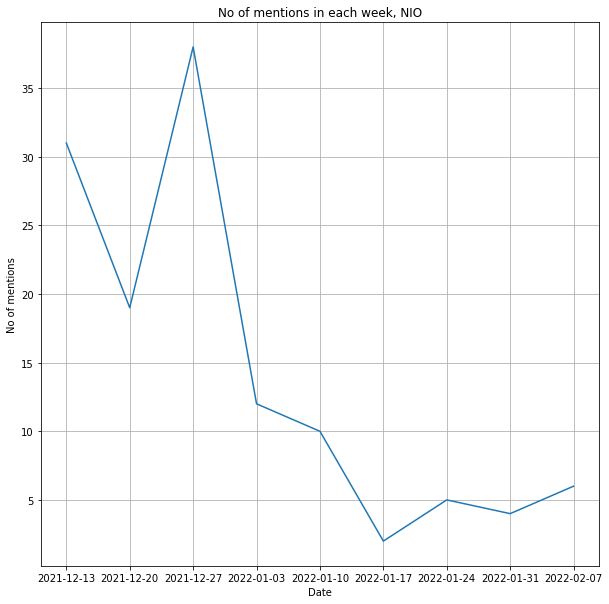

In [64]:
plt.plot(final['Date'],final['Mentions'])
plt.title('No of mentions in each week, '+stock_name )
plt.xlabel('Date')
plt.ylabel('No of mentions')
plt.grid()

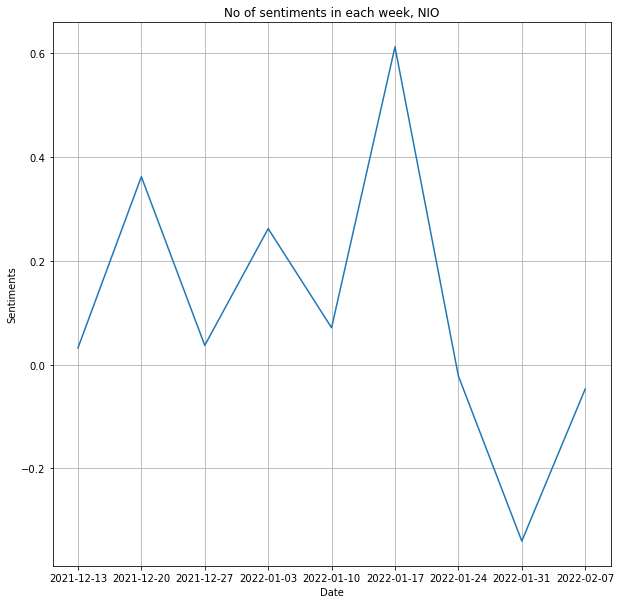

In [73]:
plt.plot(final['Date'],final['Total/Compound'])
plt.title('No of sentiments in each week, '+ stock_name)
plt.xlabel('Date')
plt.ylabel('Sentiments')
plt.grid()

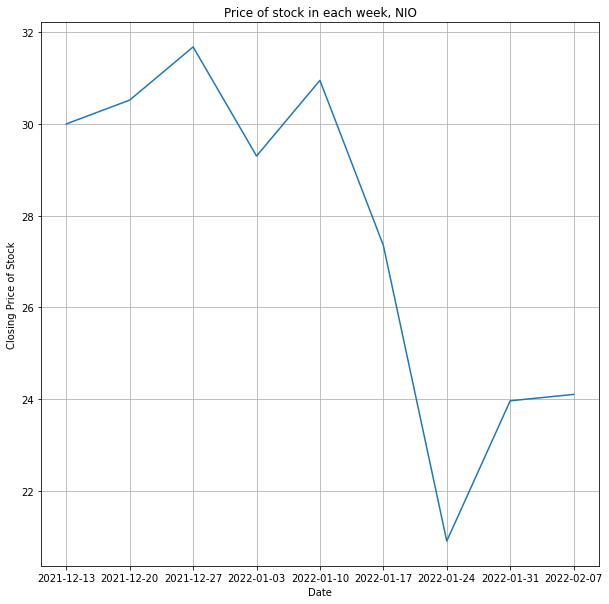

In [74]:
plt.plot(final['Date'],data['Adj Close'])
plt.title('Price of stock in each week, '+ stock_name)
plt.xlabel('Date')
plt.ylabel('Closing Price of Stock')
plt.grid()